# 400_RQ4-What is the lifespan of a console and which developers perform best

In this notebook we will answer our fourth research question based on consoles

Firstly we will look at rtrying to predict the lifespan of a console and whether there is a certain point when a developer should release a new console. Then we will look at how developerts compare against each other.

## Datasets

- Input: 400_Console_Sales.pkl && 400_Console_Life_Yearly_Data.pkl && 400_Total_Console_Sales.pkl
- Output: n/a

In [2]:
import os 
import sys
import pandas as pd
import numpy as np 
import hashlib 
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline 

In [3]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 22

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [4]:
if not os.path.exists("../../data/analysis/400_Console_Sales.pkl"):
    print("Missing Dataset File")

In [5]:
if not os.path.exists("../../data/analysis/400_Console_Life_Yearly_Data.pkl"):
    print("Missing Dataset File")

In [6]:
if not os.path.exists("../../data/analysis/400_Total_Console_Sales.pkl"):
    print("Missing Dataset File")

## Loading the datasets

In [7]:
sales = pd.read_pickle("../../data/analysis/400_Console_Sales.pkl")
sales.shape

(10, 11)

In [8]:
console = pd.read_pickle("../../data/analysis/400_Console_Life_Yearly_Data.pkl")
console.shape

(37, 36)

In [9]:
console_sales = pd.read_pickle("../../data/analysis/400_Total_Console_Sales.pkl")
console_sales.shape

(5,)

## Overview of datasets

In [10]:
sales.head()

Console,Playstation 4,Nintendo switch,Xbox one,Nintendo 3ds,Playstation vita,Playstation 3,Nintendo wii u,Xbox 360,PSP,Nintendo wii,Nintendo ds
Year,,,,,,,,,,,
2008,NaN,NaN,NaN,NaN,NaN,10.46,NaN,11.16,14.05,24.09,29.47
2009,NaN,NaN,NaN,NaN,NaN,13.26,NaN,10.36,9.92,21.05,27.28
2010,NaN,NaN,NaN,NaN,NaN,13.83,NaN,13.53,9.36,17.26,20.55
2011,NaN,NaN,NaN,12.56,0.48,14.42,NaN,13.95,7.38,11.49,8.76
2012,NaN,NaN,NaN,13.48,3.69,11.97,2.17,10.69,4.22,5.08,3.01


In [11]:
sales.columns.values

array(['Playstation 4', 'Nintendo switch', 'Xbox one', 'Nintendo 3ds',
       'Playstation vita', 'Playstation 3', 'Nintendo wii u', 'Xbox 360',
       'PSP', 'Nintendo wii', 'Nintendo ds'], dtype=object)

In [12]:
console.head()

,NES,Wii,GB,DS,X360,PS3,PS2,SNES,GBA,PS4,...,NG,TG16,3DO,GG,PCFX,Sony,Nintendo,Microsoft,Sega,Atari
Year_of_Release,,,,,,,,,,,,,,,,,,,,,
1980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1984.0,50.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
console.columns.values

array(['NES', 'Wii', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX', 'Sony', 'Nintendo', 'Microsoft', 'Sega',
       'Atari'], dtype=object)

# Introduction

The first part of the question looks at the lifespan of a console. It is interesting to look at as it will show if there is a certain time period where companies should introduce a new console. It will also be interesting to see whether this lifespan differs between different console developers.

The second part looks at the different companies. Within the gaming community there is a big thing of which console is better xbox (Microsoft) or Playstation (Sony), but which developer actually performs better and does this change with the iteration of new consoles.

## Console lifespan

Firstly we will look at the console lifespan. We will look at both sales of consoles and sales of games on these consoles.

Text(0.5,1,'Yearly console sales')

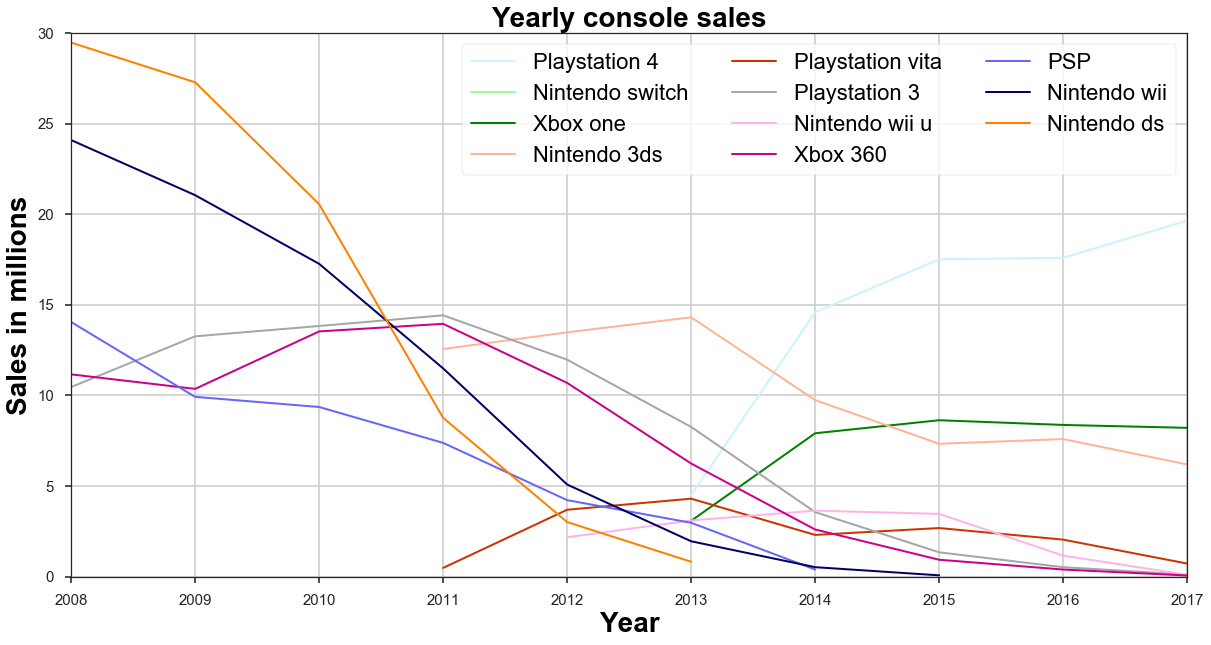

In [14]:
fig, ax = plt.subplots()

ax.plot(sales['Playstation 4'], color = '#ccf2ff')
ax.plot(sales['Nintendo switch'],color = '#99ff99')
ax.plot(sales['Xbox one'], color = '#008000')
ax.plot(sales['Nintendo 3ds'],color = '#ffb399')
ax.plot(sales['Playstation vita'], color = '#cc3300')
ax.plot(sales['Playstation 3'], color = '#a6a6a6')
ax.plot(sales['Nintendo wii u'], color = '#ffb3e6')
ax.plot(sales['Xbox 360'],color = '#cc0088')
ax.plot(sales['PSP'], color = '#6666ff')
ax.plot(sales['Nintendo wii'],color = '#000066')
ax.plot(sales['Nintendo ds'],color = '#ff8000')

ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(2008, 2017)
ax.set_ylim(0,30)
ax.legend(frameon=True, ncol=3, loc='upper right')
plt.title('Yearly console sales')

The above graph shows the yearly sales of consoles from 2008 to 2017. To take a better look at it i will split the consoles up into handheld and non handheld. I am also going to remove the Nintendo switch as it only came out in 2017 and so does not help with the answering of this research question.

Text(0.5,1,'non handheld console sales')

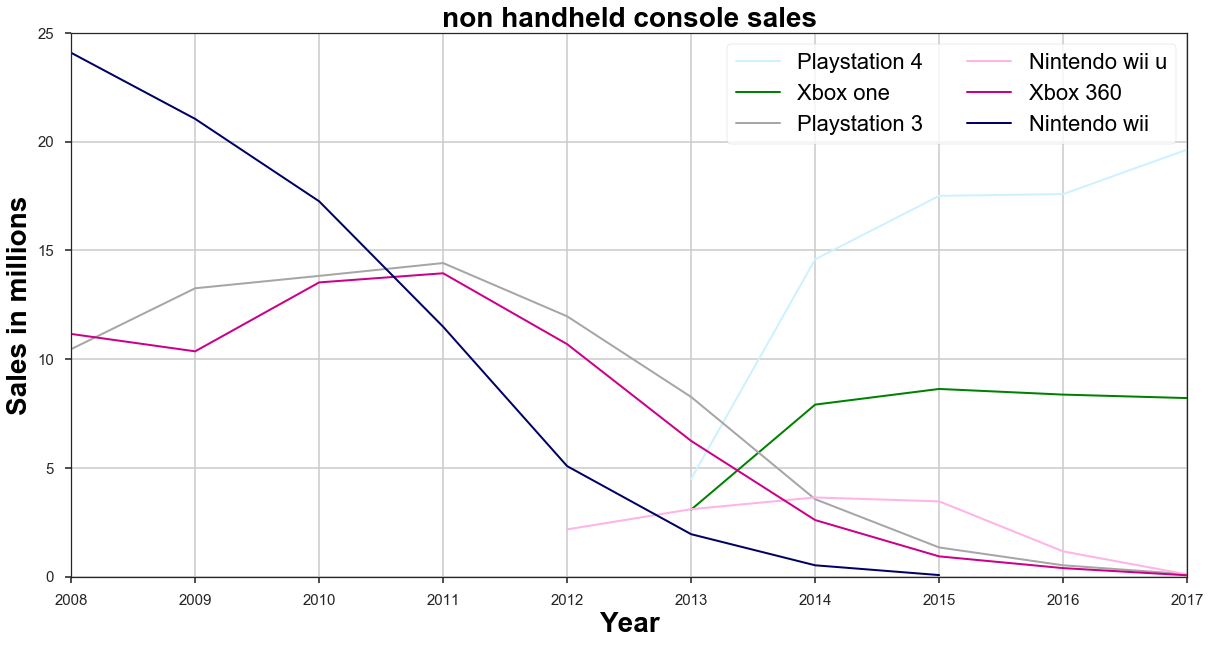

In [15]:
fig, ax = plt.subplots()

ax.plot(sales['Playstation 4'], color = '#ccf2ff')
ax.plot(sales['Xbox one'], color = '#008000')
ax.plot(sales['Playstation 3'], color = '#a6a6a6')
ax.plot(sales['Nintendo wii u'], color = '#ffb3e6')
ax.plot(sales['Xbox 360'],color = '#cc0088')
ax.plot(sales['Nintendo wii'],color = '#000066')
 

ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(2008, 2017)
ax.set_ylim(0,25)
ax.legend(frameon=True, ncol=2, loc='upper right')
plt.title('non handheld console sales')

Text(0.5,1,'Handheld console sales')

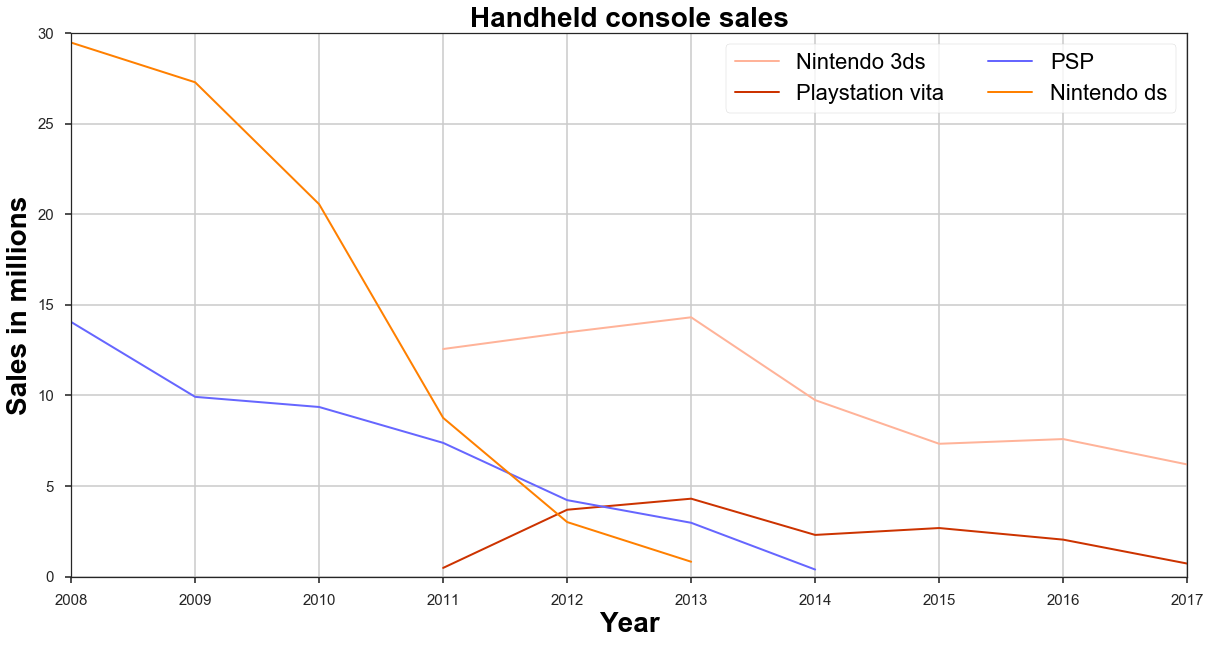

In [16]:
fig, ax = plt.subplots()

ax.plot(sales['Nintendo 3ds'],color = '#ffb399')
ax.plot(sales['Playstation vita'], color = '#cc3300')
ax.plot(sales['PSP'], color = '#6666ff') 
ax.plot(sales['Nintendo ds'],color = '#ff8000')

ax.set_xlabel('Year')
ax.set_ylabel('Sales in millions')

ax.set_xlim(2008, 2017)
ax.set_ylim(0,30)
ax.legend(frameon=True, ncol=2, loc='upper right')
plt.title('Handheld console sales')

From the two graphs above we can see that there is no real lifespan of a console. Each console lasts a different lenght of time with only similar consoles from competitors having the same lifespan. However this is due to competition and companie bringing out new consoles at the same time in order to compete within the market.

To gert a better look at this we are going to look at game sales for each console. Again we will split this up into handheld and non handheld consoles. For non handheld consoles i am also going to  split it into older and newer consoles.

Text(0.5,1,'Game sales on older generation consoles')

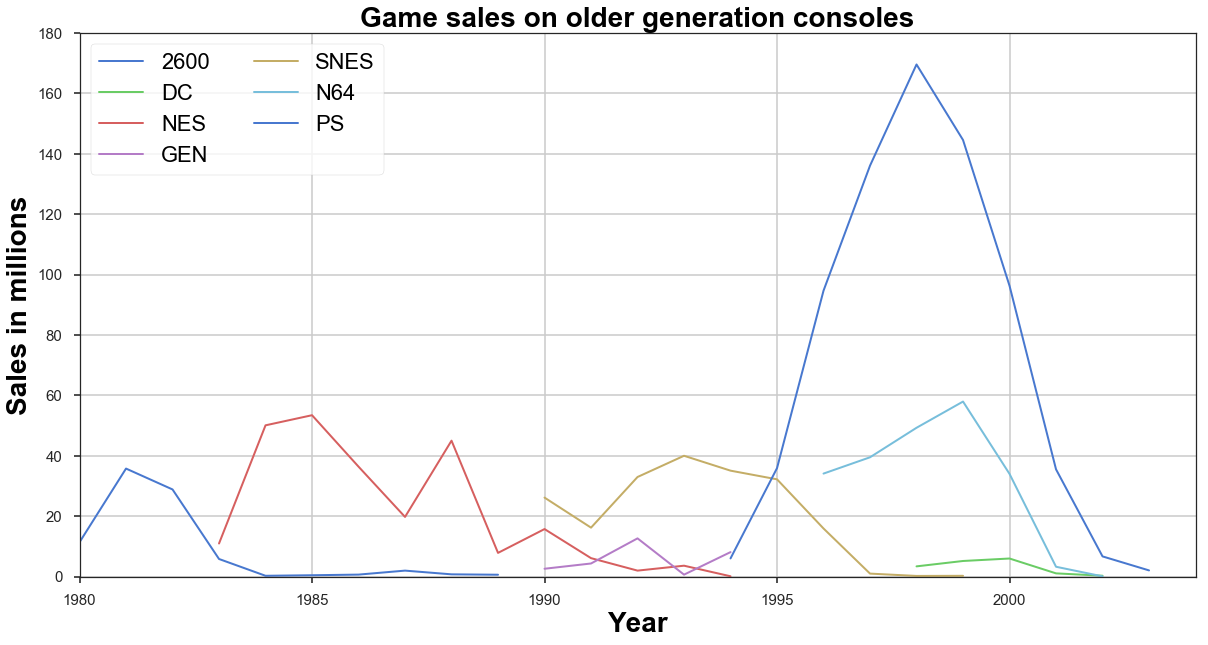

In [17]:
fig, ax = plt.subplots()

ax.plot(console['2600'])
ax.plot(console['DC'])
ax.plot(console['NES'])
ax.plot(console['GEN'])
ax.plot(console['SNES'])
ax.plot(console['N64'])
ax.plot(console['PS'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 180)
ax.set_xlim(1980, 2004)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on older generation consoles')

Text(0.5,1,'Game sales on newer generation consoles')

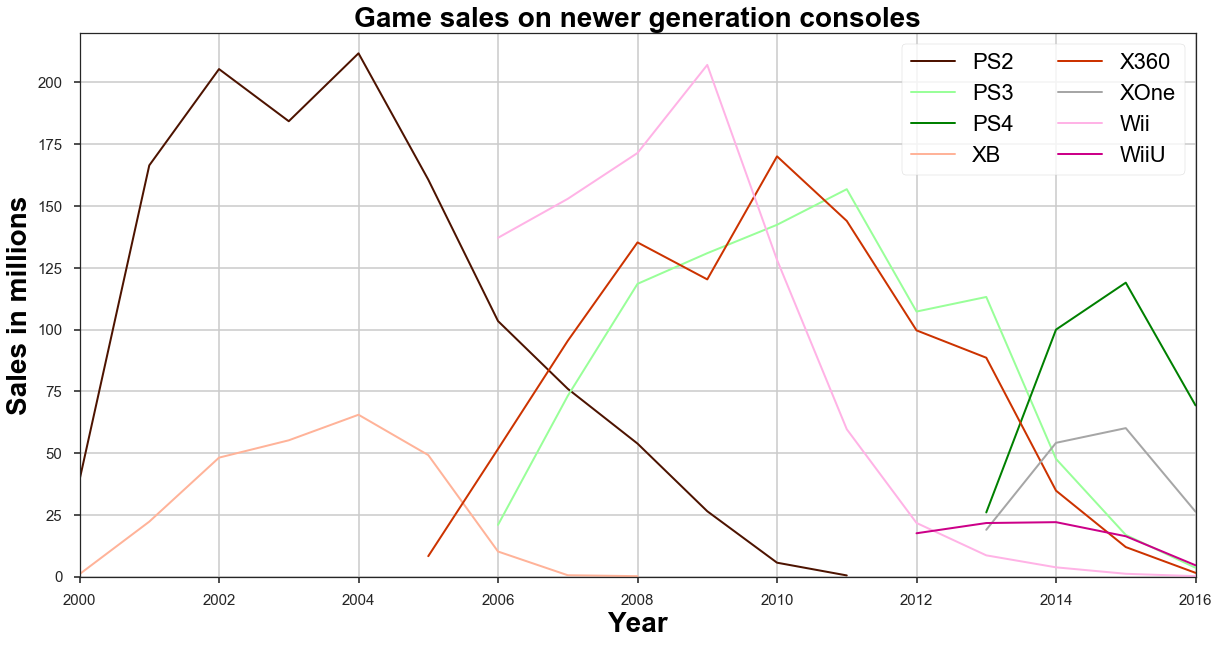

In [18]:
fig, ax = plt.subplots()

ax.plot(console['PS2'],color = '#4d1300')
ax.plot(console['PS3'],color = '#99ff99')
ax.plot(console['PS4'], color = '#008000')
ax.plot(console['XB'],color = '#ffb399')
ax.plot(console['X360'], color = '#cc3300')
ax.plot(console['XOne'], color = '#a6a6a6')
ax.plot(console['Wii'], color = '#ffb3e6')
ax.plot(console['WiiU'],color = '#cc0088')

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 220)
ax.set_xlim(2000, 2016)
ax.legend( frameon=True, ncol=2, loc='upper right')
plt.title('Game sales on newer generation consoles')

The above two graphs show the games sold on both older and newer generation consoles. Again we can see that each console has a varying lifespan. However one thing to be pointed out is that with newer consoles, the games sold tend to reach there peak in the fourth year. This might be an indication that the best time to bring out a new console is every four years.

Noiw to look at handheld consoles

Text(0.5,1,'Game sales on handheld consoles')

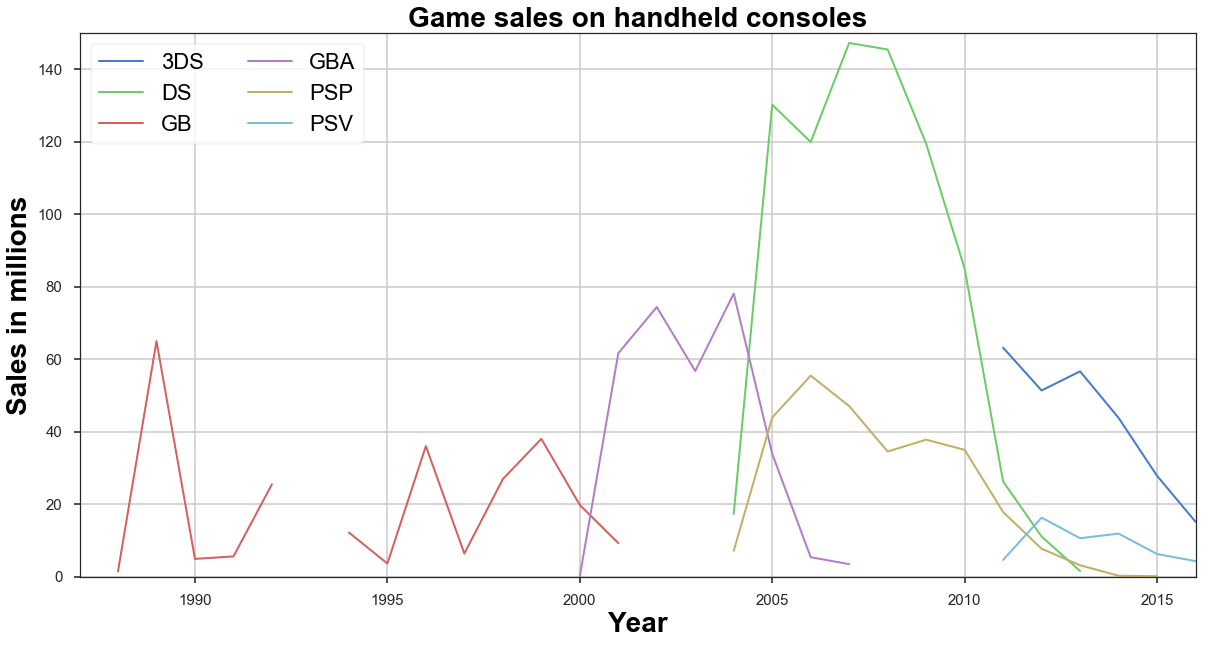

In [19]:
fig, ax = plt.subplots()

ax.plot(console['3DS'])
ax.plot(console['DS'])
ax.plot(console['GB'])
ax.plot(console['GBA'])
ax.plot(console['PSP'])
ax.plot(console['PSV'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 150)
ax.set_xlim(1987, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on handheld consoles')

The above graph shows the game sales on handheld consoles. Again there is no apparent lifespan for a console. There does again seem to be a common peak in game sales of two years. This shows handheld consoles most likely dont have the lifespan of a regular console, it is also a good indication that a company should release a new handheld console every two years.

## Best performing developer

Now we will look at the second part of the question on the best performing console developer. We will look at both consoles made and sold aswell as game sales.

Over the last thirty years there have been five main console developers. However only three of these have remaine over the last few years so we will take a closer look at them and finally end the debate of the best console.

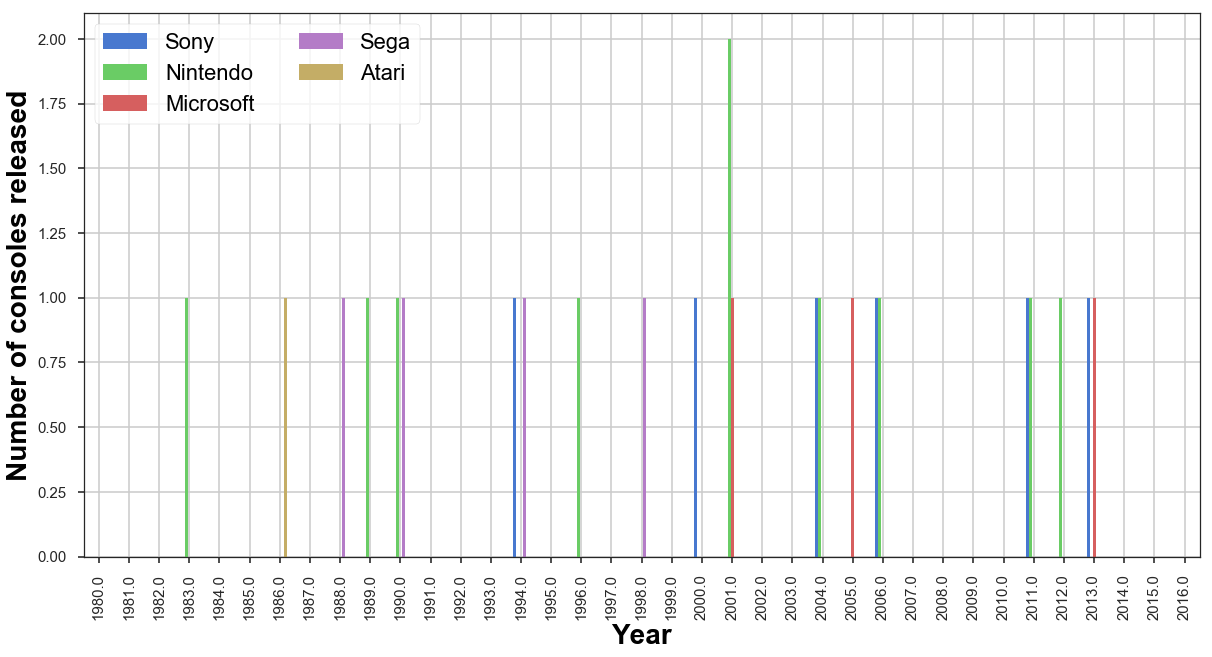

In [19]:
ax = console.plot(y = ['Sony', 'Nintendo', 'Microsoft','Sega', 'Atari'], kind = 'bar')
ax.set_xlabel("Year")
ax.set_ylabel("Number of consoles released")
ax.legend( frameon=True, ncol=2, loc='upper left')

The above graph shows each year a company released a console and how many consoles they released. Nintendo is the only company that has released two consoles in the same year.

Text(0,0.5,'Sales in millions')

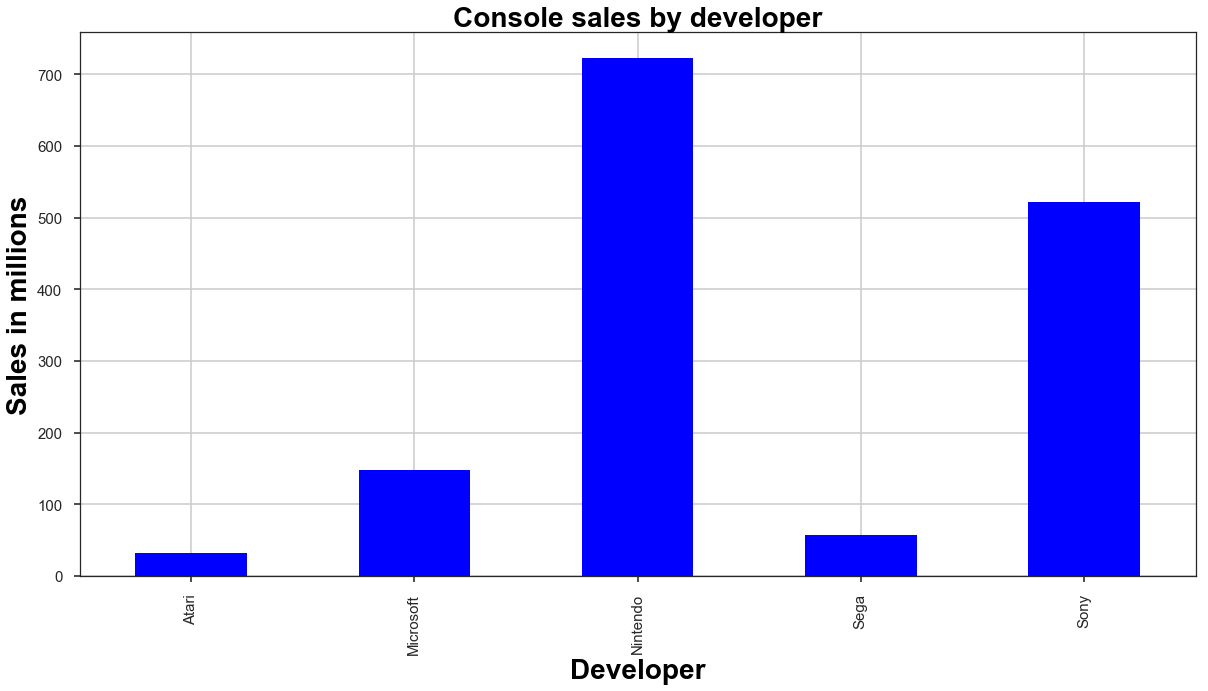

In [20]:
ax = console_sales.plot( kind = 'bar',color = 'b', title = 'Console sales by developer')
ax.set_xlabel("Developer")
ax.set_ylabel("Sales in millions")

The above graph shows the total console sale for each developer. We can see that Nintendo and Sony are the best performing consoles.

From now I am only going to look at the three competitors in the market currently as i am finding the best performing developer and both atari and sega are no longer in competition with the current three.

Aswell as this both Sony and Nintendo make both handheld and non handheld consoles so I will split these up to take a better look at where each competitor performs best. Firstly I will look at non handheld consoles.

Text(0.5,1,'Game sales on Nintendo consoles')

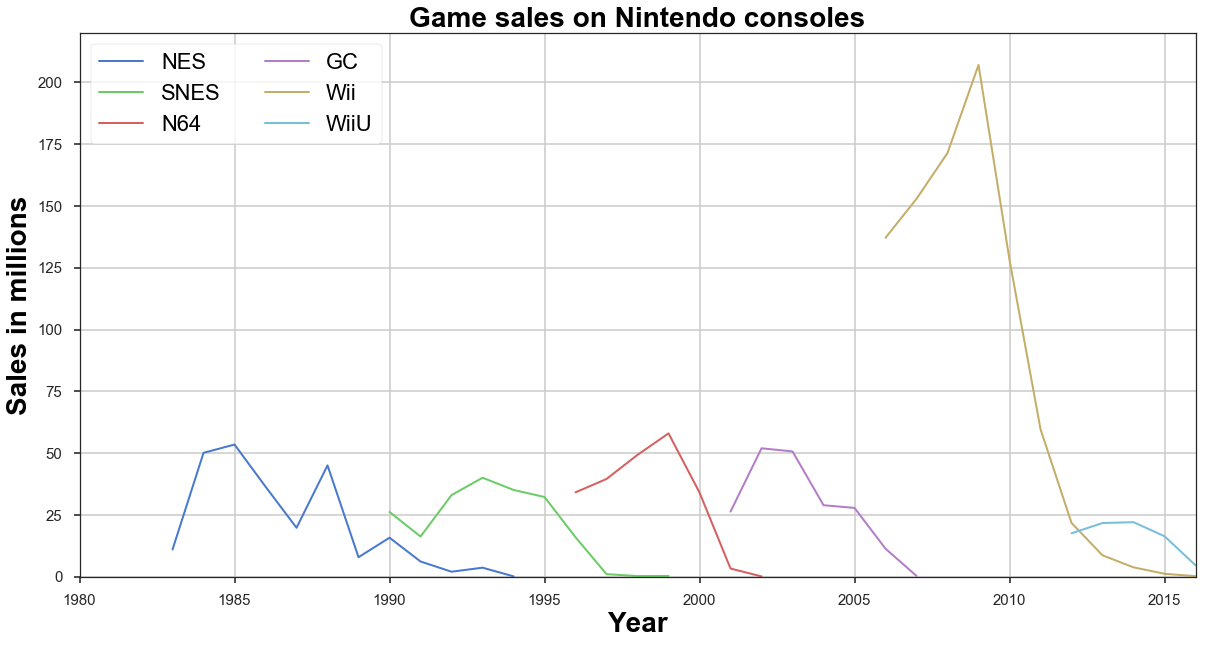

In [21]:
fig, ax = plt.subplots()

ax.plot(console['NES'])
ax.plot(console['SNES'])
ax.plot(console['N64'])
ax.plot(console['GC'])
ax.plot(console['Wii'])
ax.plot(console['WiiU'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 220)
ax.set_xlim(1980, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on Nintendo consoles')

Text(0.5,1,'Game sales on Sony consoles')

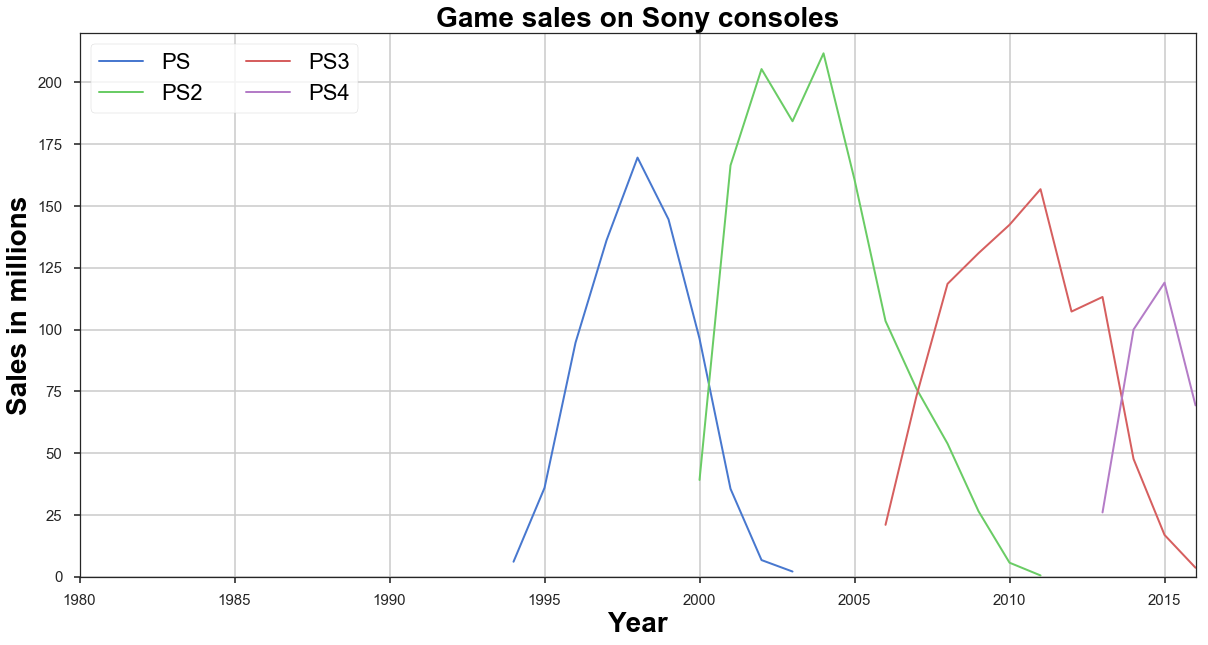

In [22]:
fig, ax = plt.subplots()

ax.plot(console['PS'])
ax.plot(console['PS2'])
ax.plot(console['PS3'])
ax.plot(console['PS4'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 220)
ax.set_xlim(1980, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on Sony consoles')

Text(0.5,1,'Game sales on Microsoft consoles')

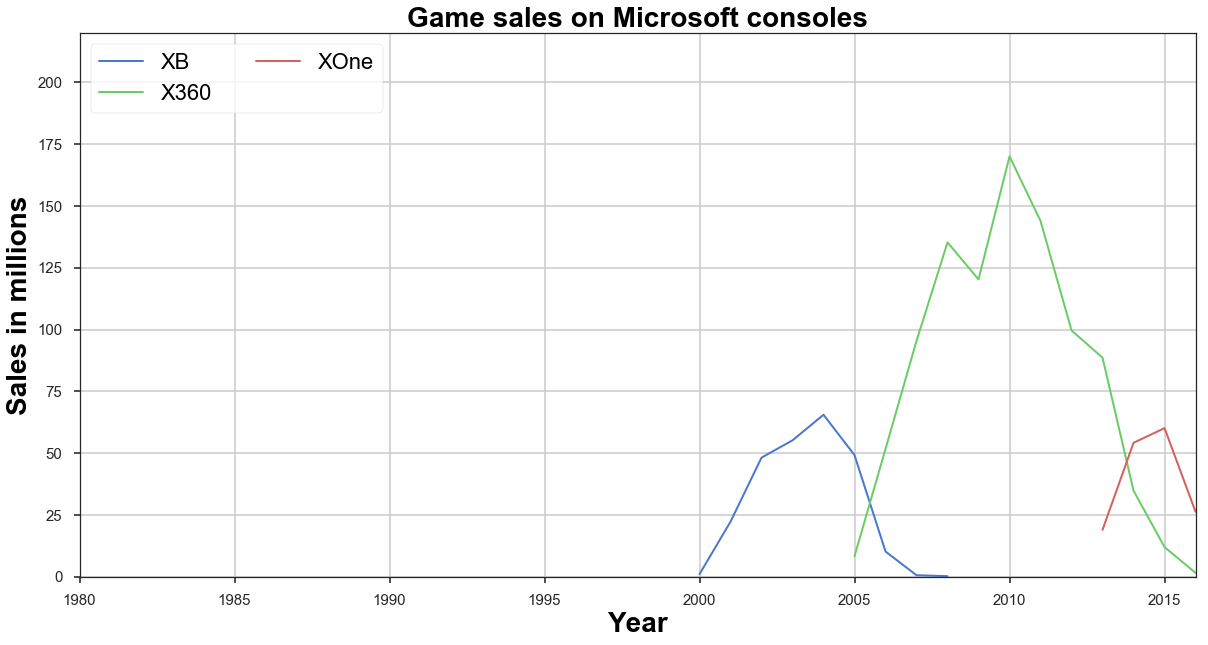

In [23]:
fig, ax = plt.subplots()

ax.plot(console['XB'])
ax.plot(console['X360'])
ax.plot(console['XOne'])

ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 220)
ax.set_xlim(1980, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on Microsoft consoles')

The above three graphs show the game sales on non handheld consoles made by all three companies. I have made the x and y axis the same on each gfraph to make them easier to compare.

We can see that Sony beats the competition with the playstation 2 being the best console of all time. Microsofts xbox 360 just about beat the playstation 3. As for Nintendo, sales on its consoles were quite poor with the exception of the nintendo wii which out performed both the playstation 3 and the xbox 360.

Text(0.5,1,'Game sales on Nintendo handheld consoles')

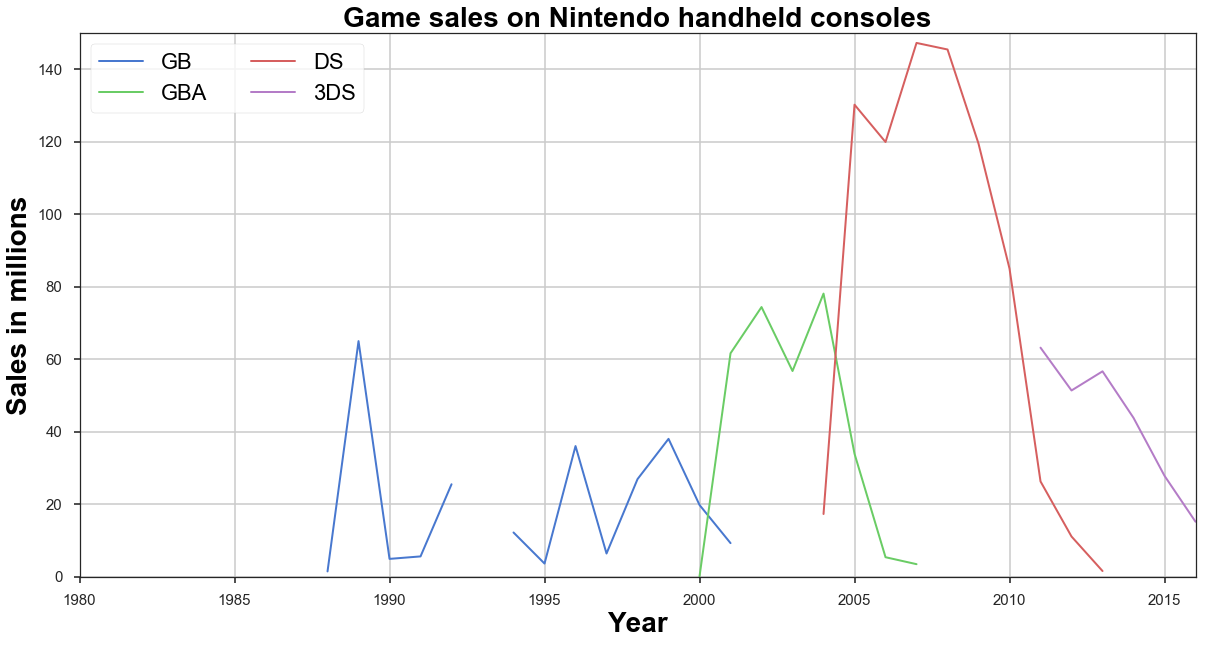

In [24]:
fig, ax = plt.subplots()

ax.plot(console['GB'])
ax.plot(console['GBA'])
ax.plot(console['DS'])
ax.plot(console['3DS'])
 
ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 150)
ax.set_xlim(1980, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on Nintendo handheld consoles')

Text(0.5,1,'Game sales on Sony handheld consoles')

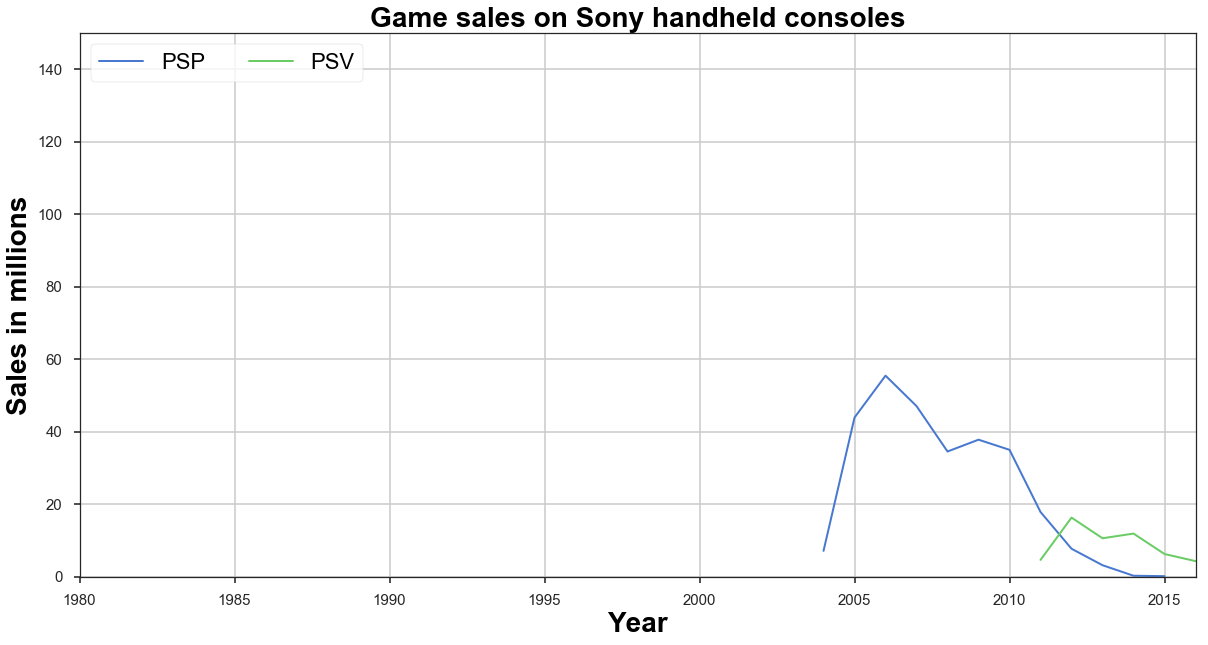

In [25]:
fig, ax = plt.subplots()

ax.plot(console['PSP'])
ax.plot(console['PSV'])
 
ax.set_xlabel("Year")
ax.set_ylabel("Sales in millions")
ax.set_ylim(0, 150)
ax.set_xlim(1980, 2016)
ax.legend( frameon=True, ncol=2, loc='upper left')
plt.title('Game sales on Sony handheld consoles')

The above two graphs show the game sales on handheld consoles by both Nintendo and Sony. We can see that Nintendo consoles way out perform Sony handheld consoles.

# Conclusions - What is the lifespan of a console and who is the best console developer

- Not possible to predict the lifespan of a console
- Console game sales tend to peak in the fourth year
- Handheld console game sales tend to peak in the second year
- Sony is the best console developer
- Nintendo is the best handheld console developer

# Aside - Hybrid consoles

Niontendos past two consoles, the nintendo wiiu and the nintendo switch have both been a cross between a normal console and a handheld console, specifically the switch. Therefore we could use these consoles in both analysis. However, the wiiu is not completely capable of being a handheld console, and the switch is not used in the analysis since it only came out in 2017.

However in coming years this may give nintendo an edge in the market unless Sony and Microsoft come up with something just as new.